In [2]:
#from google.colab import drive
#drive.mount("/content/drive", force_remount=True)

Here, each neurons have some weights (in above picture w1, w2, w3) and biases and based on this computations are done as,

combination = bias + weights * input (F = w1*x1 + w2*x2 + w3*x3)

and finally activation function is applied

output = activation(combination)

in above picture activation is

sigmoid represented by 1/(1 + e-F).

**There are some other activation functions as well like ReLU, Leaky ReLU, tanh, and many more.**

**Working Of ANN**

**At First, information is feed into the input layer which then transfers it to the hidden layers, and interconnection between these two layers assign weights to each input randomly at the initial point. and then bias is added to each input neuron and after this, the weighted sum which is a combination of weights and bias is passed through the activation function. Activation Function has the responsibility of which node to fire for feature extraction and finally output is calculated. This whole process is known as Foreward Propagation. After getting the output model to compare it with the original output and the error is known and finally, weights are updated in backward propagation to reduce the error and this process continues for a certain number of epochs (iteration). Finally, model weights get updated and prediction is done.**

**Advantages**

ANN has the ability to learn and model non-linear and complex relationships as many relationships between input and output are non-linear.
After training, ANN can infer unseen relationships from unseen data, and hence it is generalized.
Unlike many machine learning models, ANN does not have restrictions on datasets like data should be Gaussian distributed or nay other distribution.

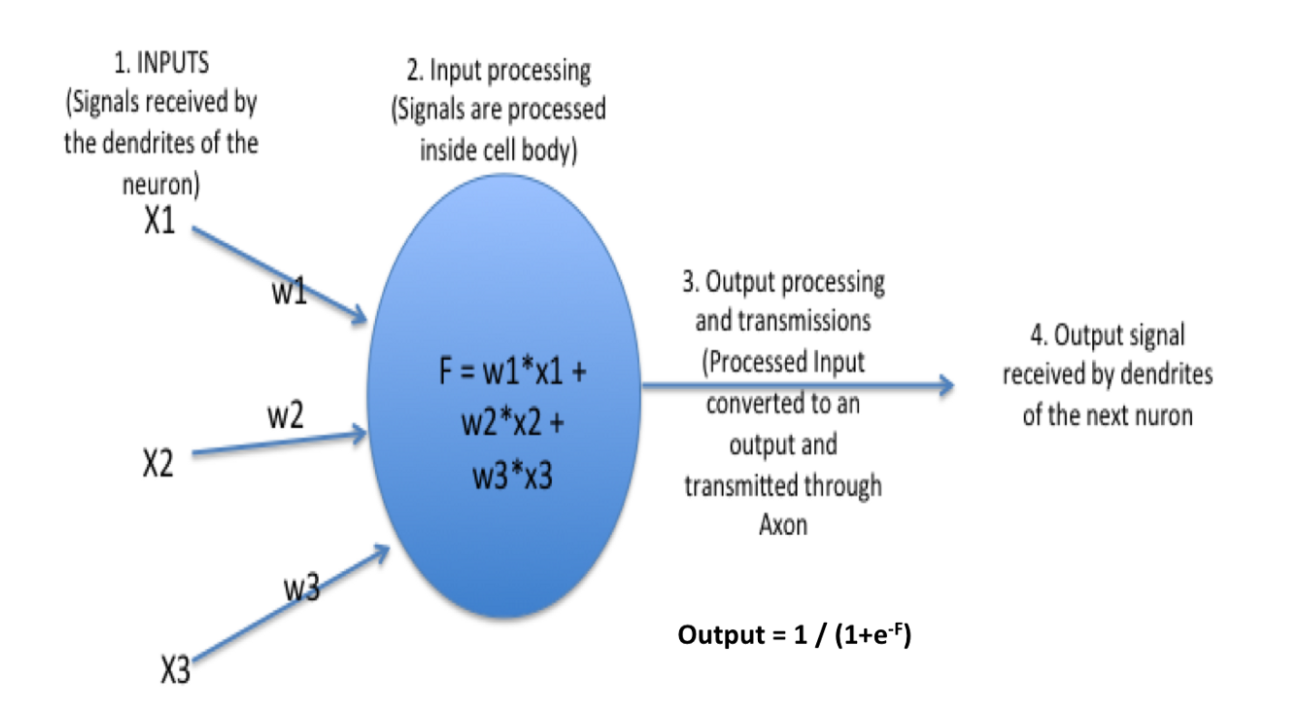

In [3]:
!wget https://raw.githubusercontent.com/liquidcarrot/data.pima-indians-diabetes/master/src/raw.csv

--2023-10-14 12:35:24--  https://raw.githubusercontent.com/liquidcarrot/data.pima-indians-diabetes/master/src/raw.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23435 (23K) [text/plain]
Saving to: ‘raw.csv’

raw.csv             100%[===================>]  22.89K  --.-KB/s    in 0s      

2023-10-14 12:35:24 (146 MB/s) - ‘raw.csv’ saved [23435/23435]



In [4]:
!ls

raw.csv  sample_data


In [5]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

In [6]:
dataset = pd.read_csv('raw.csv')
dataset.head()


,pregnancies,plasma glucose concentration,diastolic blood pressure,triceps skinfold thickness,insulin,body mass index,diabetes pedigree function,age,diabetic
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
dataset.columns

Index(['pregnancies', 'plasma glucose concentration',
       'diastolic blood pressure', 'triceps skinfold thickness', 'insulin',
       'body mass index', 'diabetes pedigree function', 'age', 'diabetic'],
      dtype='object')

In [8]:
X = dataset.iloc[:,0:8]
y = dataset.iloc[:,8]
X

,pregnancies,plasma glucose concentration,diastolic blood pressure,triceps skinfold thickness,insulin,body mass index,diabetes pedigree function,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetic, Length: 768, dtype: int64

**Defining the Keras Model**

Models in Keras are defined as a sequence of layers in which each layer is added one after another. The input should contain input features and is specified when creating the first layer with the input_dims argument. Here inputs_dims will be 8.

**Now a question arises that how can we decide the number of layers and number of neurons in each layer?**

It is quite difficult to know how many layers we should use. Generally for this Keras tuner is used, which takes a range of layers, a range of neurons, and some activation functions. and then by permutation and combination, it tries to find which is best suited. But one disadvantage of this is it takes lots of time. You can refer to the documentation of it Keras Tuner for more details.

In this example, a fully connected network with a three-layer is used which is defined using the Dense Class. The first argument takes the number of neurons in that layer and, and the activation argument takes the activation function as an input. **Here ReLU is used as an activation function in the first two layers and sigmoid in the last layer as it is a binary classification problem.**

In [10]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

**Compile Keras Model**

While compiling we must specify the loss function to calculate the errors, **the optimizer for updating the weights and any metrics.**

In this case, we will use **“binary_crossentropy“** as the loss argument as it is a **binary classification problem.**

Here we will take optimizer as **“adam“** as it automatically tunes itself and gives good results in a wide range of problems and finally we will collect and report the classification accuracy through metrics argument.

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Fitting The Keras Model.**

Now we will fit our model on the loaded data by calling the fit() function on the model.

The training process will run for a fixed number of iterations through the dataset which is specified using the epochs argument. The number of dataset rows should be and are updated within each epoch, and set using the batch_size argument.

Here, We will run for 150 epochs and a batch size of 10.

In [13]:
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
77/77 [==============================] - 1s 2ms/step - loss: 3.3941 - accuracy: 0.5026
Epoch 2/150
77/77 [==============================] - 0s 1ms/step - loss: 0.8293 - accuracy: 0.6276
Epoch 3/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6863 - accuracy: 0.6497
Epoch 4/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6493 - accuracy: 0.6602
Epoch 5/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6265 - accuracy: 0.6745
Epoch 6/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6279 - accuracy: 0.6458
Epoch 7/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6084 - accuracy: 0.6562
Epoch 8/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6125 - accuracy: 0.6732
Epoch 9/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6078 - accuracy: 0.6771
Epoch 10/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6208 - accuracy: 0.6732
Epoch 11/

**Evaluate Keras Model**

The evaluation of the model on the dataset can be done using the evaluate() function. **It takes two arguments i.e, input and output.** It will generate a prediction for each input and output pair and collect scores, including the average loss and any metrics such as accuracy.

The evaluate() function will return a list with two values first one is the loss of the model and the second will be the accuracy of the model on the dataset. We are only interested in reporting the accuracy and hence we ignored the loss value.

In [14]:
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 990us/step - loss: 0.4679 - accuracy: 0.7773
Accuracy: 77.73


**Make Predictions**

Prediction can be done by calling the predict() function on the model. Here sigmoid activation function is used on the output layer, so the predictions will be a probability in the range between 0 and 1.

In [26]:
predictions = model.predict(X)
rounded = [round(x[0]) for x in predictions]

print(rounded)

24/24 [==============================] - 0s 1ms/step
[1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0

In [29]:
#Predicting result for Single Observation
print(model.predict([[3,	78,	50,	32,	88,	31.0,	0.248,	26]]) > 0.5)

1/1 [==============================] - 0s 27ms/step
[[False]]


In [27]:
dataset.head(10)

,pregnancies,plasma glucose concentration,diastolic blood pressure,triceps skinfold thickness,insulin,body mass index,diabetes pedigree function,age,diabetic
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [30]:
dataset.shape

(768, 9)

In [51]:
model = Sequential()
model.add(Dense(32, input_dim=8, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
77/77 [==============================] - 1s 1ms/step - loss: 3.3461 - accuracy: 0.5612
Epoch 2/150
77/77 [==============================] - 0s 1ms/step - loss: 0.7681 - accuracy: 0.6302
Epoch 3/150
77/77 [==============================] - 0s 1ms/step - loss: 0.7051 - accuracy: 0.6406
Epoch 4/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6270 - accuracy: 0.6758
Epoch 5/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6845 - accuracy: 0.6523
Epoch 6/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5943 - accuracy: 0.7018
Epoch 7/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6195 - accuracy: 0.6784
Epoch 8/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5886 - accuracy: 0.6875
Epoch 9/150
77/77 [==============================] - 0s 1ms/step - loss: 0.5868 - accuracy: 0.7031
Epoch 10/150
77/77 [==============================] - 0s 1ms/step - loss: 0.6034 - accuracy: 0.7057
Epoch 11/

In [52]:
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 1ms/step - loss: 0.4283 - accuracy: 0.7943
Accuracy: 79.43


In [53]:
predictions = model.predict(X)
rounded = [round(x[0]) for x in predictions]

print(rounded)

24/24 [==============================] - 0s 1ms/step
[1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0